In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time

In [3]:
import kid_readout.roach.heterodyne
reload(kid_readout.roach.heterodyne)

<module 'kid_readout.roach.heterodyne' from '/home/gjones/readout/kid_readout/kid_readout/roach/heterodyne.pyc'>

In [4]:
ri = kid_readout.roach.heterodyne.RoachHeterodyne()

In [5]:
ri.initialize()

Loaded ROACH state from /data/detectors/roach_config.npz


In [6]:
import kid_readout.utils.sweeps

In [7]:
512e6/2**14

31250.0

In [8]:
kid_readout.utils.sweeps.prepare_sweep(ri,np.array([100.0,]),
                                       offsets=(512./2**14)*np.arange(-4,4)/8.,nsamp=2**18)


bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0



array([[  99.984375  ],
       [  99.98828125],
       [  99.9921875 ],
       [  99.99609375],
       [ 100.        ],
       [ 100.00390625],
       [ 100.0078125 ],
       [ 100.01171875]])

In [9]:
ri.readout_selection

array([0])

In [10]:
ri.set_fft_gain(0)

In [11]:
loop = True
demod = False
data = []
for bank in range(ri.tone_bins.shape[0]):
    ri.select_bank(bank)
    ri._sync(loopback=loop)
    time.sleep(0.1)
    d,addr = ri.get_data(2,demod=demod)
    data.append(d)
#data = np.array(data)

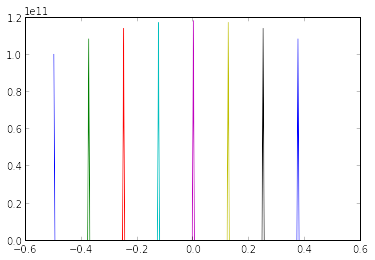

In [12]:
for d in data:
    pxx,fr = mlab.psd(d[:,0],Fs=1.,window=window_none)
    plot(fr,10*(pxx))


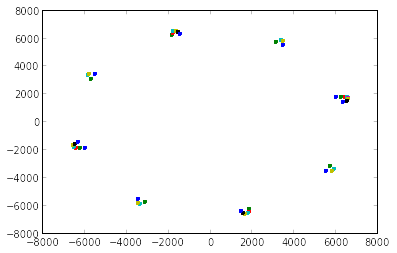

In [13]:
for d in data:
    plot(d.real[:,0],d.imag[:,0],'.')

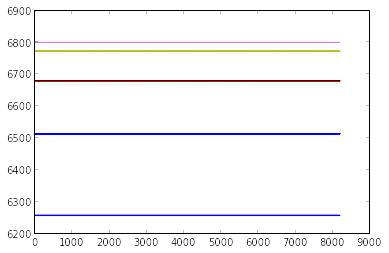

In [14]:
for d in data:
    plot(np.abs(d[:,0]))

In [15]:
dlator = kid_readout.roach.heterodyne.Demodulator()

In [16]:
dmod = []
for bank in range(ri.tone_bins.shape[0]):
    d = data[bank][:,0]
    dmod.append(dlator.demodulate(d,ri.tone_bins[bank,0],ri.tone_nsamp,ri.phases[0],
                                  ri.fft_bins[bank,0]))

-0.5
-0.375
-0.25
-0.125
0.0
0.125
0.25
0.375


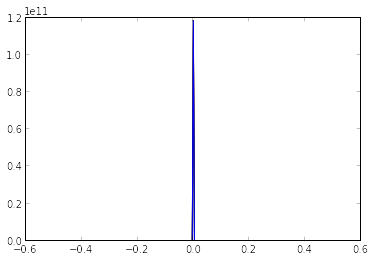

In [17]:
for d in dmod:
    pxx,fr = mlab.psd(d,Fs=1.,window=window_none)
    plot(fr,10*(pxx))

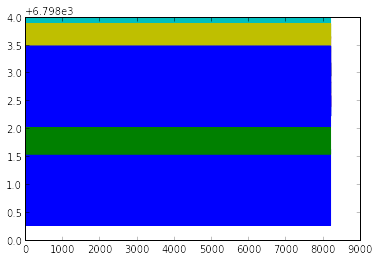

In [18]:
for d in dmod:
    plot(np.abs(d))

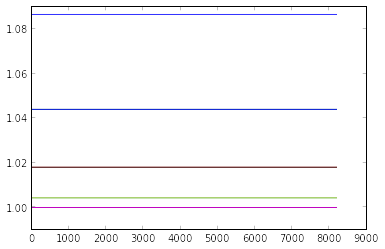

In [19]:
for bank in range(8):
    plot(np.abs(dmod[bank])/np.abs(data[bank][:,0]))

(-8, 8)

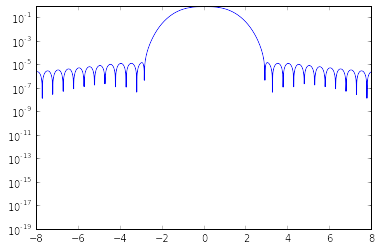

In [20]:
semilogy(dlator._window_frequency,dlator._window_response)
xlim(-8,8)

(-2, 2)

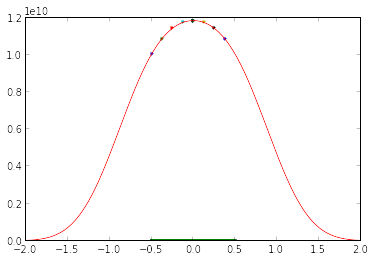

In [27]:
mx = 0
for d in data:
    pxx,fr = mlab.psd(d[:,0],Fs=1.,window=window_none)
    plot(fr,(pxx),'.')
    if pxx.max() > mx:
        mx = pxx.max()
for d in dmod:
    pxx,fr = mlab.psd(d,Fs=1.,window=window_none)
    plot(fr,(pxx),'.')
plot(dlator._window_frequency,(dlator._window_response/dlator._window_response.max())**2*mx)
xlim(-2,2)
#ylim(4.5e9,6e9)

In [22]:
for d in dmod:
    pxx,fr = mlab.psd(d,Fs=2.,window=window_none)
    print pxx.max()

5916914515.68
5919354845.74
5920521103.21
5921175654.05
5920174208.0
5921562214.61
5920587801.48
5920037389.51


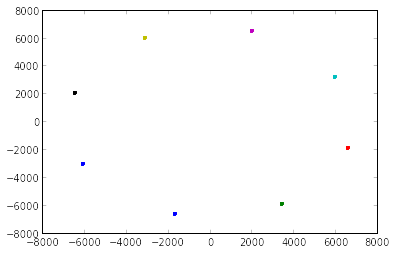

In [23]:
for d in dmod:
    plot(np.real(d),d.imag,'.')

In [24]:
np.sum(np.abs(dlator._window_frequency)<10)

2559

In [25]:
ri.fft_bins.shape

(8, 1)

In [26]:
plot(swp.freqs,np.abs(swp.data))

NameError: name 'swp' is not defined

In [ ]:
'%08x' % ri.r.read_int('fftshift')

In [ ]:
plot(swp.data.imag)

In [31]:
loop = True
demod = True
data = []
for bank in range(ri.tone_bins.shape[0]):
    ri.select_bank(bank)
    ri._sync(loopback=loop)
    time.sleep(0.1)
    d,addr = ri.get_data(2,demod=demod)
    data.append(d)
#data = np.array(data)

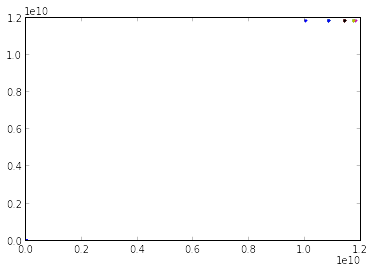

In [32]:
for bank in range(8):
    d = data[bank][:,0]
    pxx,fr = mlab.psd(d,Fs=1.,window=window_none)
    d = dmod[bank]
    pxx2,fr = mlab.psd(d,Fs=1.,window=window_none)
    plot(pxx,pxx2,'.')
